In [58]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import lux
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import pandas.util.testing as tm

In [59]:
#Read the data
data=pd.read_csv("D:\\Machine Learning\\Research Work\\IoT intrusion detection\\BOT IOT Dataset\\Training and Test Dataset\\Rec_Scan.csv")

In [60]:
#Making a copy of data
data=data.copy()

#Feature Engineering

1. Understanding Data

In [61]:
#checking the missing values
data.isnull().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64


In [62]:
data.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 12777 entries, 0 to 12776
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pkSeqID            12777 non-null  int64  
 1   proto              12777 non-null  object 
 2   saddr              12777 non-null  object 
 3   sport              12777 non-null  int64  
 4   daddr              12777 non-null  object 
 5   dport              12777 non-null  int64  
 6   seq                12777 non-null  int64  
 7   stddev             12777 non-null  float64
 8   N_IN_Conn_P_SrcIP  12777 non-null  int64  
 9   min                12777 non-null  float64
 10  state_number       12777 non-null  int64  
 11  mean               12777 non-null  float64
 12  N_IN_Conn_P_DstIP  12777 non-null  int64  
 13  drate              12777 non-null  float64
 14  srate              12777 non-null  float64
 15  max                12777 non-null  float64
 16  attack             127

In [63]:
data.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3639738,udp,192.168.100.149,49313,192.168.100.5,3,16215,0.0,15,0.000162,4,0.000162,58,0.0,0.0,0.000162,1,Reconnaissance,Service_Scan
1,3605011,udp,192.168.100.148,35008,192.168.100.3,37444,10125,0.0,14,0.000041,4,0.000041,58,0.0,0.0,0.000041,1,Reconnaissance,Service_Scan
2,3658668,udp,192.168.100.149,43759,192.168.100.5,1008,36685,0.0,18,0.000321,4,0.000321,75,0.0,0.0,0.000321,1,Reconnaissance,Service_Scan
3,3608035,udp,192.168.100.149,39704,192.168.100.3,20,13347,0.0,15,0.000000,4,0.000000,58,0.0,0.0,0.000000,1,Reconnaissance,Service_Scan
4,3599417,udp,192.168.100.149,39704,192.168.100.3,20031,4194,0.0,42,0.000000,4,0.000000,83,0.0,0.0,0.000000,1,Reconnaissance,Service_Scan


In [64]:
data['proto'].unique()

array(['udp', 'tcp', 'arp', 'ipv6-icmp'], dtype=object)

In [65]:
data['saddr'].unique()

array(['192.168.100.149', '192.168.100.148', '192.168.100.150',
       '192.168.100.147', '192.168.100.5', '192.168.100.3',
       '192.168.100.27', 'fe80::250:56ff:febe:254',
       'fe80::250:56ff:febe:e9d9', '192.168.100.46',
       'fe80::250:56ff:febe:26db', '192.168.100.1', '192.168.100.6',
       'fe80::250:56ff:febe:89ee', '192.168.100.4', '192.168.100.7'],
      dtype=object)

In [66]:
data['daddr'].unique()

array(['192.168.100.5', '192.168.100.3', '192.168.217.2',
       '192.168.100.147', '192.168.100.55', '192.168.100.148',
       '255.255.255.255', '96.7.49.66', '205.251.197.206',
       '192.168.100.1', '205.251.194.201', '224.0.0.251',
       '205.251.196.32', '52.201.147.106', '192.5.5.241', '192.55.83.30',
       '192.31.80.30', '192.168.100.150', '8.8.8.8', '13.55.154.73',
       'ff02::2', '192.41.162.30', '129.250.35.250', 'ff02::fb',
       '27.124.125.250', '199.19.56.1', '192.33.14.30', '205.251.199.148',
       '192.58.128.30', '192.12.94.30', '192.168.100.149',
       '205.251.196.160', '205.251.199.194', '192.36.148.17',
       '184.85.248.65', '192.33.4.12', '52.11.124.117', '192.168.100.255',
       '192.54.112.30', 'ff02::1', '172.217.25.170', '205.251.194.102',
       '192.112.36.4', '192.168.100.7', '205.251.194.86',
       '192.168.100.27', '192.52.178.30', '205.251.195.59', '52.35.35.13'],
      dtype=object)

In [67]:
data.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [68]:
#Removing the unwanted coloumns
col=['saddr','daddr','category','subcategory']
data=data.drop(columns=col,axis=1)

In [69]:
#Removing the dublicate values
data.drop_duplicates(keep='first',inplace=True)

2. Exploratory Data Analysis

In [70]:
data.head()

,pkSeqID,proto,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
0,3639738,udp,49313,3,16215,0.0,15,0.000162,4,0.000162,58,0.0,0.0,0.000162,1
1,3605011,udp,35008,37444,10125,0.0,14,0.000041,4,0.000041,58,0.0,0.0,0.000041,1
2,3658668,udp,43759,1008,36685,0.0,18,0.000321,4,0.000321,75,0.0,0.0,0.000321,1
3,3608035,udp,39704,20,13347,0.0,15,0.000000,4,0.000000,58,0.0,0.0,0.000000,1
4,3599417,udp,39704,20031,4194,0.0,42,0.000000,4,0.000000,83,0.0,0.0,0.000000,1


In [71]:
#Frequency of each category
data['proto'].value_counts()

tcp          8428
udp          4324
arp            22
ipv6-icmp       3
dtype: int64


In [72]:
#relationship between the independent variables
data.corr()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [73]:
#Cross tables and data visualization
#Extracting the coloumn names
data.columns

Index(['pkSeqID', 'proto', 'sport', 'dport', 'seq', 'stddev',
       'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max', 'attack'],
      dtype='object')

In [74]:
#proto proportion table
pd.crosstab(index=data['proto'],columns='count',normalize=True)

col_0,count
proto,
arp,0.001722
ipv6-icmp,0.000235
tcp,0.659623
udp,0.338421


In [75]:
#proto vs attack
pd.crosstab(index=data['proto'],columns=data['attack'],normalize=True)

attack,0,1
proto,,
arp,0.000783,0.000939
ipv6-icmp,0.000235,0.000000
tcp,0.001017,0.658605
udp,0.007200,0.331220


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

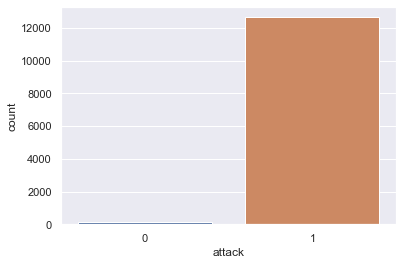

In [76]:
#frequency distribution of attack
sns.countplot(data['attack'])

In [77]:
data=data.drop(columns='pkSeqID')

In [78]:
#Categorical Encoding
data=pd.get_dummies(data)

In [79]:
data.head()

,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,proto_arp,proto_ipv6-icmp,proto_tcp,proto_udp
0,49313,3,16215,0.0,15,0.000162,4,0.000162,58,0.0,0.0,0.000162,1,0,0,0,1
1,35008,37444,10125,0.0,14,0.000041,4,0.000041,58,0.0,0.0,0.000041,1,0,0,0,1
2,43759,1008,36685,0.0,18,0.000321,4,0.000321,75,0.0,0.0,0.000321,1,0,0,0,1
3,39704,20,13347,0.0,15,0.000000,4,0.000000,58,0.0,0.0,0.000000,1,0,0,0,1
4,39704,20031,4194,0.0,42,0.000000,4,0.000000,83,0.0,0.0,0.000000,1,0,0,0,1


In [80]:
#Seperating the features and target variable
y=data['attack']
x=data.drop(columns='attack')

In [81]:
data.shape

(12777, 17)

In [82]:
x.shape

(12777, 16)

#

In [83]:
#Balancing the target variable
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 0)
x, y = smk.fit_sample(x,y)

In [84]:
x.shape

(25294, 16)

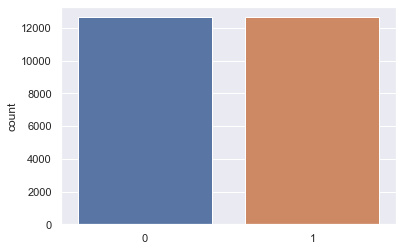

In [85]:
sns.countplot(y)

In [86]:
#Spliting dataset into Train and Test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [87]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [88]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
clf=AdaBoostClassifier()
clf.fit(x_train,y_train)

AdaBoostClassifier()

In [89]:
#Checking the accuracy of model
from sklearn.metrics import accuracy_score
y_pred=clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(" Testing Accuracy: %.2f%%" % (accuracy * 100.0))
scores = cross_val_score(clf, x_train, y_train, cv=10)
print("Cross Validation Accuracy: %.2f%% " % (scores.mean()*100))

 Testing Accuracy: 100.00%
Cross Validation Accuracy: 99.95% 


Text(0.5, 1.0, 'AdaboostClassifier')

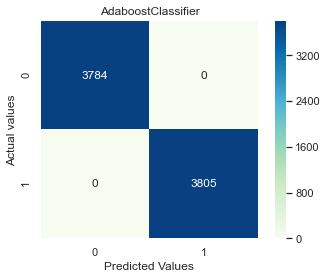

In [90]:
#confusion matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
axes = sns.heatmap(con, square=True,annot=True,fmt='d',cbar = True, cmap = plt.cm.GnBu)
ax = plt.axes()
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
ax.set_title('AdaboostClassifier')

In [91]:
from sklearn.metrics import classification_report
print('Adaboost Classifier')
print(classification_report(y_test, y_pred))

Adaboost Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3784
           1       1.00      1.00      1.00      3805

    accuracy                           1.00      7589
   macro avg       1.00      1.00      1.00      7589
weighted avg       1.00      1.00      1.00      7589



In [92]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

1.0

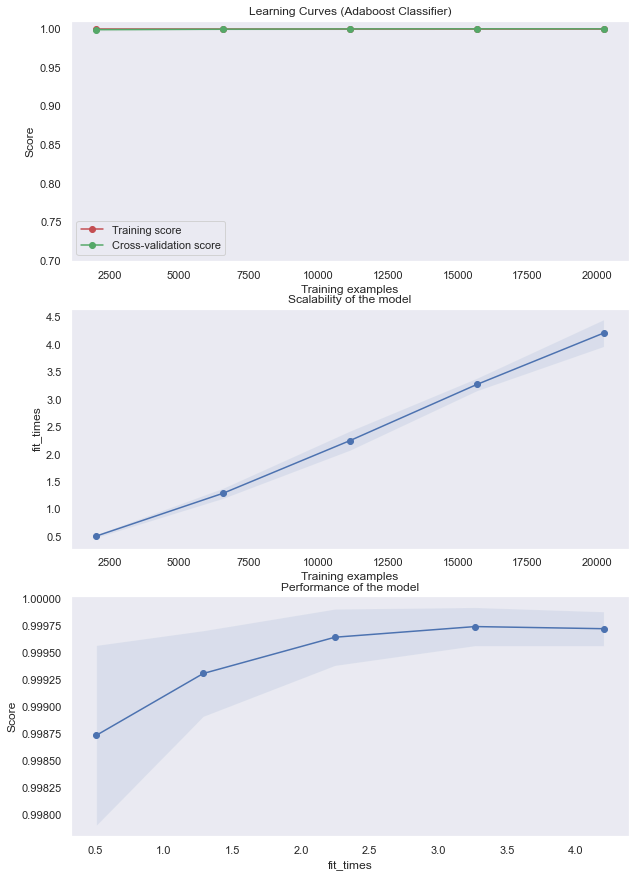

In [93]:
#from sklearn.model_selection import learning_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, x, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")


fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Learning Curves (Adaboost Classifier)"
# Cross validation with 10 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = AdaBoostClassifier()
plot_learning_curve(estimator, title, x, y,axes=axes[:,], cv=cv, ylim=(0.7, 1.01), n_jobs=4)

plt.show()